In [6]:
#initial set up: importing required modules
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

col_list = ['#cc615c', '#6965a7', '#f1bdbf']
sns.set_palette(col_list)

In [12]:
#importing data from credit.csv to dataframe, with an index on the 1st column
credit_df = pd.read_csv("Credit.csv", index_col=0)

In [13]:
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [14]:
# we have 7 numeric and 4 object variables
# none of the variables have Null (or NaN) data values
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [15]:
#converting datatype categorical variables from object to category

credit_df.Gender = credit_df.Gender.astype('category')
credit_df.Student = credit_df.Student.astype('category')
credit_df.Married = credit_df.Married.astype('category')
credit_df.Ethnicity = credit_df.Ethnicity.astype('category')

In [16]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null category
Student      400 non-null category
Married      400 non-null category
Ethnicity    400 non-null category
Balance      400 non-null int64
dtypes: category(4), float64(1), int64(6)
memory usage: 26.9 KB


In [17]:
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [18]:
# ensuring that there aren't any Null (or NaN) data values in the dataframe
credit_df.isnull().values.any()

False

In [20]:
# Describing numeric and categorical variables in the dataframe

credit_df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [21]:
credit_df.describe(include=['category'])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


C:\Users\Jasraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


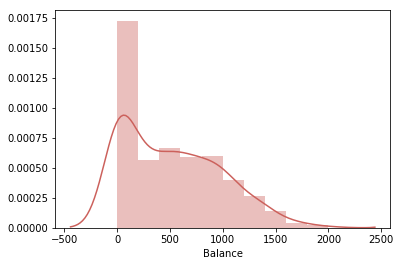

In [22]:
#examining target variable - Balance

sns.distplot(credit_df.Balance)

In [23]:
from scipy.stats import norm, skew

skewed_bal = skew(credit_df['Balance'])
print(skewed_bal)

0.5824005770413042


In [24]:
# creating additional dataframe containing only the observations with a positive Balance

active_credit_df = credit_df.loc[credit_df.Balance>0,].copy()
active_credit_df.Balance.describe()

count     310.000000
mean      670.987097
std       413.904019
min         5.000000
25%       338.000000
50%       637.500000
75%       960.750000
max      1999.000000
Name: Balance, dtype: float64

C:\Users\Jasraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


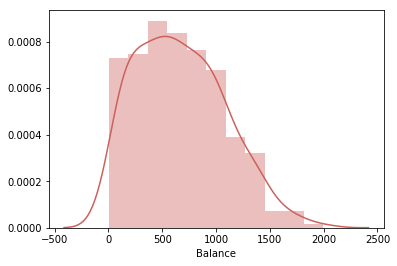

In [25]:
# without the zero Balances, the curve resembles a normal distribution

sns.distplot(active_credit_df.Balance)

In [26]:
active_skewed_bal = skew(active_credit_df['Balance'])
print(active_skewed_bal)

0.4648182287361973


([<matplotlib.axis.YTick at 0x2d4f8183710>,
 <a list of 7 Text yticklabel objects>)

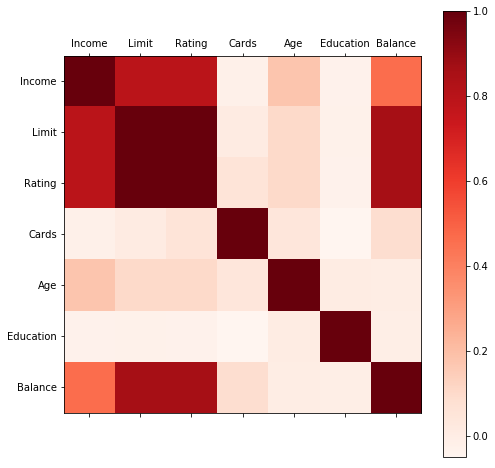

In [27]:
# Creating a correlation matrix to visualize the relationships among the numerical predictors and the target of inference

numeric_credit_df = credit_df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,8))
plt.matshow(credit_df.corr(), cmap=plt.cm.Reds, fignum=1)
plt.colorbar()
tick_marks = [i for i in range(len(numeric_credit_df.columns))]
plt.xticks(tick_marks, numeric_credit_df.columns)
plt.yticks(tick_marks, numeric_credit_df.columns)

In [28]:
# checking correlation coefficients among variables from the above observations

from scipy.stats import pearsonr

r1, p1 = pearsonr(credit_df.Balance, credit_df.Limit)
msg = "Correlation coefficient Balance-Limit: {}\n p-value: {}\n"
print(msg.format(r1, p1))

r2, p2 = pearsonr(credit_df.Balance, credit_df.Rating)
msg = "Correlation coefficient Balance-Rating: {}\n p-value: {}\n"
print(msg.format(r2, p2))

r3, p3 = pearsonr(credit_df.Balance, credit_df.Income)
msg = "Correlation coefficient Balance-Income: {}\n p-value: {}\n"
print(msg.format(r3, p3))

r4, p4 = pearsonr(credit_df.Limit, credit_df.Rating)
msg = "Correlation coefficient Limit-Rating: {}\n p-value: {}\n"
print(msg.format(r4, p4))

r5, p5 = pearsonr(credit_df.Limit, credit_df.Income)
msg = "Correlation coefficient Limit-Income: {}\n p-value: {}\n"
print(msg.format(r5, p5))

r6, p6 = pearsonr(credit_df.Rating, credit_df.Income)
msg = "Correlation coefficient Rating-Income: {}\n p-value: {}\n"
print(msg.format(r6, p6))

Correlation coefficient Balance-Limit: 0.8616972670153954
 p-value: 2.5305807117137046e-119

Correlation coefficient Balance-Rating: 0.8636251606214953
 p-value: 1.8988990970400204e-120

Correlation coefficient Balance-Income: 0.46365645701575736
 p-value: 1.0308858025894099e-22

Correlation coefficient Limit-Rating: 0.9968797370016825
 p-value: 0.0

Correlation coefficient Limit-Income: 0.7920883413369414
 p-value: 2.391789442285437e-87

Correlation coefficient Rating-Income: 0.7913776251121217
 p-value: 4.362691443090436e-87



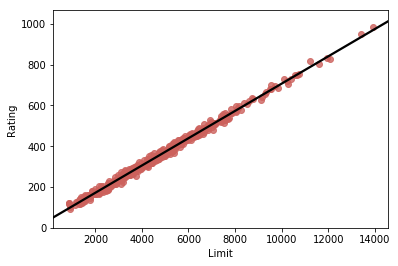

In [29]:
# Limit and Rating have a high correlation coefficient causing multicollinearity
# Verifying the same by plotting data and regression line
# Collinearity issues can be fixed by removing either Rating or Limit. Rating determines Limit levels for card owners.
# Hence, we may exclude Limit while building model

sns.regplot(x='Limit', y='Rating', data=credit_df, line_kws={'color':'black'})

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

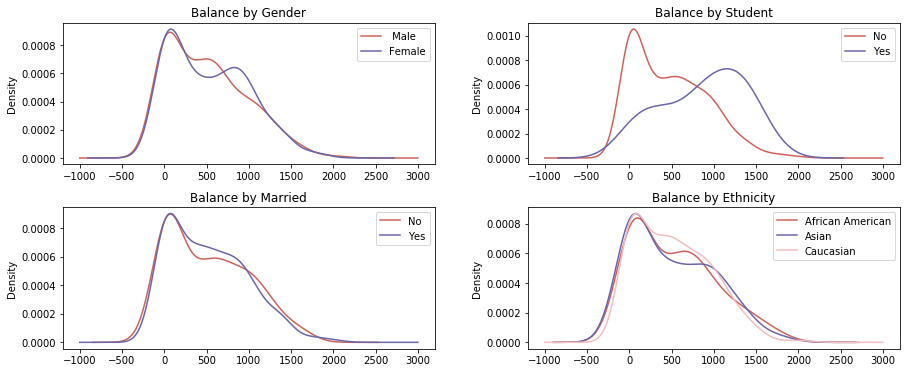

In [30]:
# examining categorical variables and their relationship to target - Balance

f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
credit_df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
credit_df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

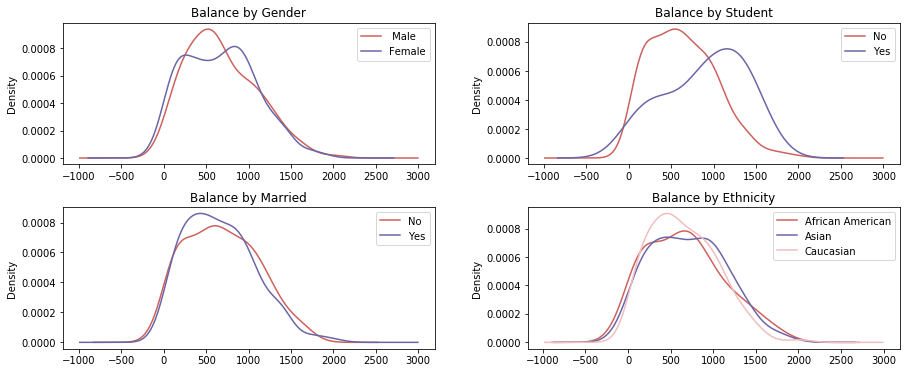

In [31]:
# examining categorical variables and their relationship to target - Balance on active customers dataframe

f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
active_credit_df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
active_credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
active_credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
active_credit_df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')

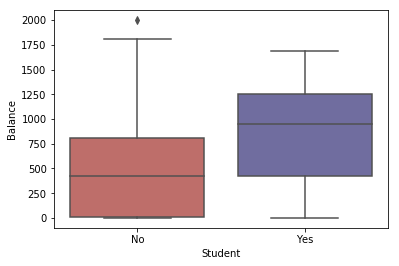

In [32]:
# Gender, Married, and Ethinicity features doesn't seem to influence Balance target variable
# However, Student seems to influence Balance target variable
# Examining Student variable using Box plot

sns.boxplot(x='Student', y='Balance', data = credit_df)

After performing EDA and examining the relationship among predictors and their influence on target 'Balance' variable. We will fit Multiple Linear Regression models on the dataset.
We will first remove 'Limit' feature from the dataset to avoid multicollinearity.
We will start with creating models using all predictors (except for Limit) on the default and active dataframes.

In [33]:
# Removed Limit feature in modelling
credit_df = credit_df.drop(columns = 'Limit')
active_credit_df = active_credit_df.drop(columns = 'Limit')

In [34]:
credit_df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,514,4,71,11,Male,No,No,Asian,580
4,148.924,681,3,36,11,Female,No,No,Asian,964
5,55.882,357,2,68,16,Male,No,Yes,Caucasian,331


In [35]:
active_credit_df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,514,4,71,11,Male,No,No,Asian,580
4,148.924,681,3,36,11,Female,No,No,Asian,964
5,55.882,357,2,68,16,Male,No,Yes,Caucasian,331


In [36]:
# creating a copy of the default dataframe, on which Label Encoding will be performed
encd_credit_df = credit_df.copy()
encd_credit_df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,514,4,71,11,Male,No,No,Asian,580
4,148.924,681,3,36,11,Female,No,No,Asian,964
5,55.882,357,2,68,16,Male,No,Yes,Caucasian,331


In [37]:
# creating a copy of the active dataframe, on which Label Encoding will be performed
encd_active_credit_df = active_credit_df.copy()
encd_active_credit_df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,514,4,71,11,Male,No,No,Asian,580
4,148.924,681,3,36,11,Female,No,No,Asian,964
5,55.882,357,2,68,16,Male,No,Yes,Caucasian,331


In [38]:
# Label Encoding of categorical variables of the default dataframe
lablel_encoder = LabelEncoder()
encd_credit_df['Gender'] = lablel_encoder.fit_transform(encd_credit_df['Gender'])
encd_credit_df['Student'] = lablel_encoder.fit_transform(encd_credit_df['Student'])
encd_credit_df['Married'] = lablel_encoder.fit_transform(encd_credit_df['Married'])
encd_credit_df['Ethnicity'] = lablel_encoder.fit_transform(encd_credit_df['Ethnicity'])

In [39]:
encd_credit_df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,283,2,34,11,0,0,1,2,333
2,106.025,483,3,82,15,1,1,1,1,903
3,104.593,514,4,71,11,0,0,0,1,580
4,148.924,681,3,36,11,1,0,0,1,964
5,55.882,357,2,68,16,0,0,1,2,331


In [40]:
# Label Encoding of categorical variables of active dataframe
encd_active_credit_df['Gender'] = lablel_encoder.fit_transform(encd_active_credit_df['Gender'])
encd_active_credit_df['Student'] = lablel_encoder.fit_transform(encd_active_credit_df['Student'])
encd_active_credit_df['Married'] = lablel_encoder.fit_transform(encd_active_credit_df['Married'])
encd_active_credit_df['Ethnicity'] = lablel_encoder.fit_transform(encd_active_credit_df['Ethnicity'])

In [41]:
encd_active_credit_df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,283,2,34,11,0,0,1,2,333
2,106.025,483,3,82,15,1,1,1,1,903
3,104.593,514,4,71,11,0,0,0,1,580
4,148.924,681,3,36,11,1,0,0,1,964
5,55.882,357,2,68,16,0,0,1,2,331


#### Model 1: building 1st MLR model using all the predictors on the entire dataset

In [42]:
# making Independent and Dependent variables from the dataset
X1 = encd_credit_df.iloc[:,:-1]
y1 = encd_credit_df.Balance

In [43]:
# Fitting Multiple Linear Regression model
mod_mlr_default_all = LinearRegression()
mod_mlr_default_all.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
print(("intercept:", mod_mlr_default_all.intercept_))
print(("coefficients of predictors:", mod_mlr_default_all.coef_))

('intercept:', -542.9686376797418)
('coefficients of predictors:', array([-7.76737738e+00,  3.97589800e+00,  4.04446845e+00, -6.65277900e-01,
       -3.44025012e-01, -1.03770161e+01,  4.17658567e+02, -1.36433684e+01,
        3.73706867e+00]))


In [45]:
coeff = mod_mlr_default_all.coef_
coeff_mod_mlr_default_all = pd.DataFrame(coeff)
coeff_mod_mlr_default_all

,0
0,-7.767377
1,3.975898
2,4.044468
3,-0.665278
4,-0.344025
5,-10.377016
6,417.658567
7,-13.643368
8,3.737069


In [46]:
print("Coefficient of Determination R-squared: ", mod_mlr_default_all.score(X1, y1)*100)

Coefficient of Determination R-squared:  95.09451870172832


Model 1 - Observations:
* Income is negatively related to balance which could be interpreted in the sense that the higher the Income, the lower the need to use credit amount.
* Student has a positive impact and it is quite significant, which is expected.
* Age negatively impacts Balance i.e. with Age the credit card Balance decreases. This goes with the notion that people become more in charge of their finances over time.

#### Model 2: building MLR model using all the predictors on the dataset having active customers

In [47]:
X2 = encd_active_credit_df.iloc[:,:-1]
y2 = encd_active_credit_df.Balance
mod_mlr_active_all = LinearRegression()
mod_mlr_active_all.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print(("intercept:", mod_mlr_active_all.intercept_))
print(("coefficients of predictors:", mod_mlr_active_all.coef_))

('intercept:', -790.7154898308011)
('coefficients of predictors:', array([ -9.7151406 ,   4.777454  ,   3.13139711,  -1.14645433,
         1.32673842,  -2.4282155 , 478.70656715, -13.63464097,
        -1.42704894]))


In [49]:
coeff2 = mod_mlr_active_all.coef_
coeff_mod_mlr_active_all = pd.DataFrame(coeff2)
coeff_mod_mlr_active_all

,0
0,-9.715141
1,4.777454
2,3.131397
3,-1.146454
4,1.326738
5,-2.428216
6,478.706567
7,-13.634641
8,-1.427049


In [50]:
print("Coefficient of Determination - R-squared: ", mod_mlr_active_all.score(X2, y2)*100)

Coefficient of Determination - R-squared:  98.46245010558965


Model 2 on active customers dataset seems to have a better fit compared to the 1st model. This means may be the non-active customers rarely make use of their credit card, and it is difficult to draw conclusions by including them.

In [51]:
# using statsmodel to find out p-value of each predictor
mod0 = smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data = encd_credit_df).fit()
mod0.summary()

# Using p-value, we can conclude that 'Income', 'Rating', 'Age', 'Student' are the significant features, which makes sense.
# Surprisingly, the years of education doesn't have much influence on predicting Balance target.
# we may build models by considering only the significant predictors

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     840.0
Date:                Tue, 15 Jan 2019   Prob (F-statistic):          3.75e-249
Time:                        22:20:44   Log-Likelihood:                -2416.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     390   BIC:                             4893.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9686     34.809    -15.598      0.000    -611.406    -474.532
Income        -7.7674      0.244    -31.821      0.000      -8.247      -7.287
Rating         3.9759      0.055     72.259      0.000       3.868       4.084
Cards          4.0445      3.797      1.065      0.287      -3.420      11.509
Age           -0.6653      0.306     -2.174      0.030      -1.267      -0.064
Education     -0.3440      1.661     -0.207      0.836      -3.609       2.921
Gender       -10.3770     10.333     -1.004      0.316     -30.693       9.939
Student      417.6586     17.331     24.098      0.000     383.584     451.733
Married      -13.6434     10.685     -1.277      0.202     -34.651       7.364
Ethnicity      3.7371      6.256      0.597      0.551      -8.563      16.037
==============================================================================
Omnibus:                       15.374   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.514
Skew:                           0.490   Prob(JB):                     0.000259
Kurtosis:                       2.821   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 3: building MLR model using significant predictors on the entire dataset

In [52]:
X3 = encd_credit_df[['Income', 'Rating', 'Age', 'Student']].copy()
y3 = encd_credit_df.Balance
mod_mlr_default_sig = LinearRegression()
mod_mlr_default_sig.fit(X3, y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
print(("intercept:", mod_mlr_default_sig.intercept_))
print(("coefficients of predictors:", mod_mlr_default_sig.coef_))

('intercept:', -547.304701459825)
('coefficients of predictors:', array([ -7.79773241,   3.98073024,  -0.62417911, 417.50564008]))


In [54]:
coeff3 = mod_mlr_default_sig.coef_
coeff_mod_mlr_default_sig = pd.DataFrame(coeff3)
coeff_mod_mlr_default_sig

,0
0,-7.797732
1,3.980730
2,-0.624179
3,417.505640


In [182]:
print("Coefficient of Determination R-squared: ", mod_mlr_default_sig.score(X3, y3)*100)

Coefficient of Determination R-squared:  95.04078253308543


#### Model 4: building MLR model using significant predictors on the dataset having active customers

In [183]:
X4 = encd_active_credit_df[['Income', 'Rating', 'Age', 'Student']].copy()
y4 = encd_active_credit_df.Balance
mod_mlr_active_sig = LinearRegression()
mod_mlr_active_sig.fit(X4, y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
print(("intercept:", mod_mlr_active_sig.intercept_))
print(("coefficients of predictors:", mod_mlr_active_sig.coef_))

('intercept:', -778.2415694752979)
('coefficients of predictors:', array([ -9.7514357 ,   4.78445118,  -1.11410315, 481.65630598]))


In [185]:
coeff4 = mod_mlr_active_sig.coef_
coeff_mod_mlr_active_sig = pd.DataFrame(coeff4)
coeff_mod_mlr_active_sig

,0
0,-9.751436
1,4.784451
2,-1.114103
3,481.656306


In [186]:
# checking R-squared for all the models together
print("------------ coefficient of determination R^2 ----------------")
print("\nMLR - default df - all predictors:         ", mod_mlr_default_all.score(X1, y1)*100)
print("MLR - default df - significant predictors: ", mod_mlr_default_sig.score(X3, y3)*100)
print("MLR - active df - all predictors:          ", mod_mlr_active_all.score(X2, y2)*100)
print("MLR - active df - significant predictors:  ", mod_mlr_active_sig.score(X4, y4)*100)

------------ coefficient of determination R^2 ----------------

MLR - default df - all predictors:          95.09451870172832
MLR - default df - significant predictors:  95.04078253308543
MLR - active df - all predictors:           98.46245010558965
MLR - active df - significant predictors:   98.41731545399912


Although we used significant variables only, the R-squared has decreased. That means, we should analyze the relationships among these 4 variables.

Student
No     AxesSubplot(0.555556,0.125;0.344444x0.18875)
Yes    AxesSubplot(0.555556,0.125;0.344444x0.18875)
Name: Age, dtype: object

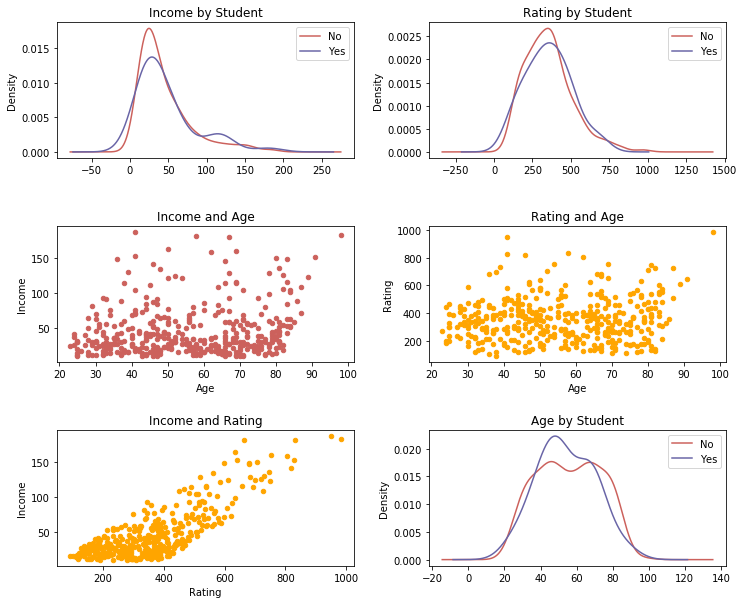

In [187]:
f, axes = plt.subplots(3, 2, figsize=(12, 10))
f.subplots_adjust(hspace=.5, wspace=.25)
credit_df.groupby('Student').Income.plot(kind='kde', ax=axes[0][0], title='Income by Student', legend=True)
credit_df.groupby('Student').Rating.plot(kind='kde', ax=axes[0][1], title='Rating by Student', legend=True)
credit_df.plot(kind='scatter', x='Age' , y='Income' , ax=axes[1][0], title='Income and Age', legend=True)
credit_df.plot(kind='scatter', x='Age' , y='Rating' , ax=axes[1][1], color='orange', title='Rating and Age', legend=True)
credit_df.plot(kind='scatter', x='Rating' , y='Income' , ax=axes[2][0], color='orange', title='Income and Rating', legend=True)
credit_df.groupby('Student').Age.plot(kind='kde', ax=axes[2][1], legend=True, title='Age by Student')

* Students have lower values of Income compared to non-Students
* Surprisingly, Income does not Increase with Age
* Positive relationship between Income and Rating
* The Age of Students compared to non-Students does not differ significantly
* Data quality may not be the best one
* Work closely with data stewards/business SMEs for further iterations